Karl Pearson’s 2nd Coefficient of Skewness:

Original : 1.0827373721712648
Min-Max : 1.082737372171265
Z-Score : 1.082737372171265
Robust : 1.0827373721712648
Log : 0.8268570482697897
Sqrt : 0.9759676250486797

Transformation with least skewness: Log


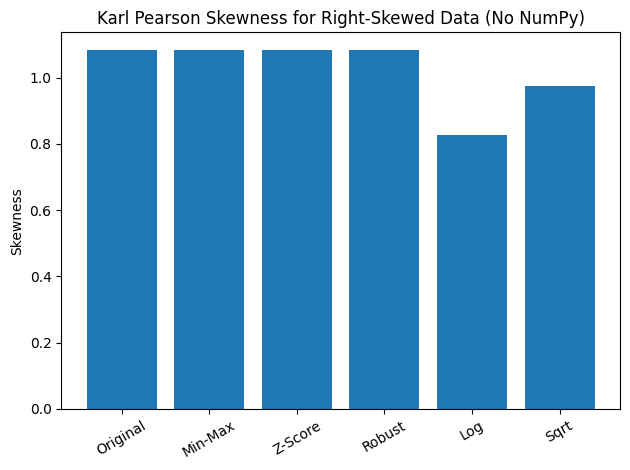

In [1]:
import math
import matplotlib.pyplot as plt

# -------------------- RIGHT-SKEWED DATASET --------------------
data = [10, 12, 13, 14, 15, 18, 40]

# -------------------- BASIC FUNCTIONS --------------------
def mean(x):
    return sum(x) / len(x)

def median(x):
    s = sorted(x)
    n = len(s)
    return (s[n//2] + s[(n-1)//2]) / 2

def std_dev(x):
    m = mean(x)
    return math.sqrt(sum((i - m) ** 2 for i in x) / len(x))

# -------------------- KARL PEARSON 2nd COEFFICIENT --------------------
def karl_pearson_skewness(x):
    return 3 * (mean(x) - median(x)) / std_dev(x)

# -------------------- TRANSFORMATIONS --------------------
def min_max(x):
    mn, mx = min(x), max(x)
    return [(i - mn) / (mx - mn) for i in x]

def z_score(x):
    m, sd = mean(x), std_dev(x)
    return [(i - m) / sd for i in x]

def percentile(x, p):
    s = sorted(x)
    k = (len(s) - 1) * p / 100
    f = int(k)
    c = min(f + 1, len(s) - 1)
    return s[f] + (k - f) * (s[c] - s[f])

def robust_scaling(x):
    med = median(x)
    iqr = percentile(x, 75) - percentile(x, 25)
    return [(i - med) / iqr for i in x]

def log_transform(x):
    return [math.log(i) for i in x]

def sqrt_transform(x):
    return [math.sqrt(i) for i in x]

# -------------------- APPLY TRANSFORMATIONS --------------------
transformations = {
    "Original": data,
    "Min-Max": min_max(data),
    "Z-Score": z_score(data),
    "Robust": robust_scaling(data),
    "Log": log_transform(data),
    "Sqrt": sqrt_transform(data)
}

# -------------------- CALCULATE & PRINT SKEWNESS --------------------
skewness_values = {}

print("Karl Pearson’s 2nd Coefficient of Skewness:\n")
for name, values in transformations.items():
    sk = karl_pearson_skewness(values)
    skewness_values[name] = sk
    print(name, ":", sk)

# -------------------- FIND LEAST SKEWNESS --------------------
least_skew = min(skewness_values, key=lambda k: abs(skewness_values[k]))
print("\nTransformation with least skewness:", least_skew)

# -------------------- BAR GRAPH --------------------
plt.figure()
plt.bar(skewness_values.keys(), skewness_values.values())
plt.ylabel("Skewness")
plt.title("Karl Pearson Skewness for Right-Skewed Data (No NumPy)")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()
